In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rfm=pd.read_csv(r"C:\Users\hp\Desktop\RFM_analysis\rfm_segments.csv")
rfm

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment
0,12346.0,326,1,77183.60,1,1,5,7,At_Risk
1,12347.0,2,7,4310.00,5,5,5,15,Champion
2,12348.0,75,4,1797.24,2,4,4,10,Loyal
3,12349.0,19,1,1757.55,4,1,4,9,Loyal
4,12350.0,310,1,334.40,1,1,2,4,Lost
...,...,...,...,...,...,...,...,...,...
4334,18280.0,278,1,180.60,1,2,1,4,Lost
4335,18281.0,181,1,80.82,1,2,1,4,Lost
4336,18282.0,8,2,178.05,5,3,1,9,Loyal
4337,18283.0,4,16,2094.88,5,5,5,15,Champion


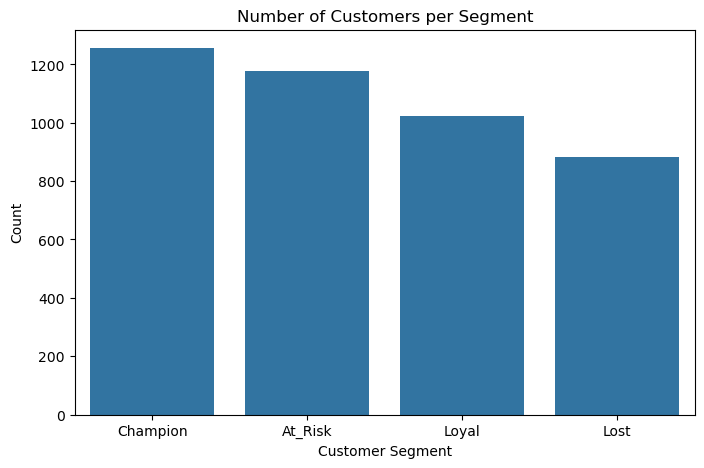

In [5]:
plt.figure(figsize=(8,5))
sns.countplot(x='Segment', data=rfm, order=rfm['Segment'].value_counts().index)
plt.title('Number of Customers per Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.show()

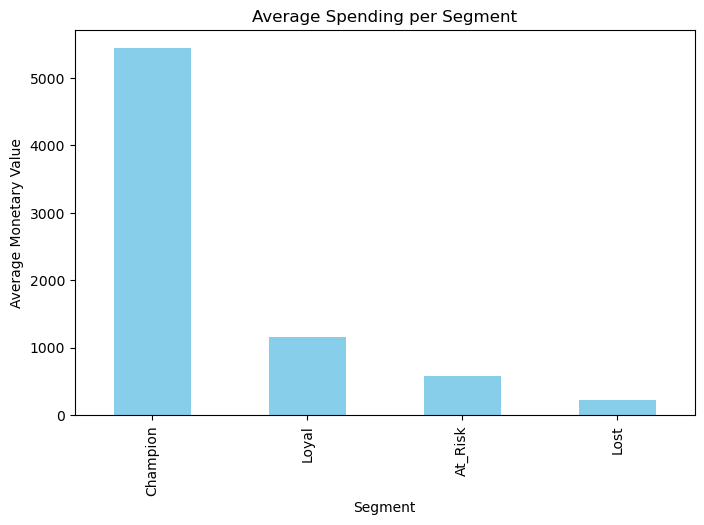

In [7]:
segment_monetary = rfm.groupby('Segment')['Monetary'].mean().sort_values(ascending=False)
segment_monetary.plot(kind='bar', color='skyblue', figsize=(8,5))
plt.title('Average Spending per Segment')
plt.ylabel('Average Monetary Value')
plt.show()

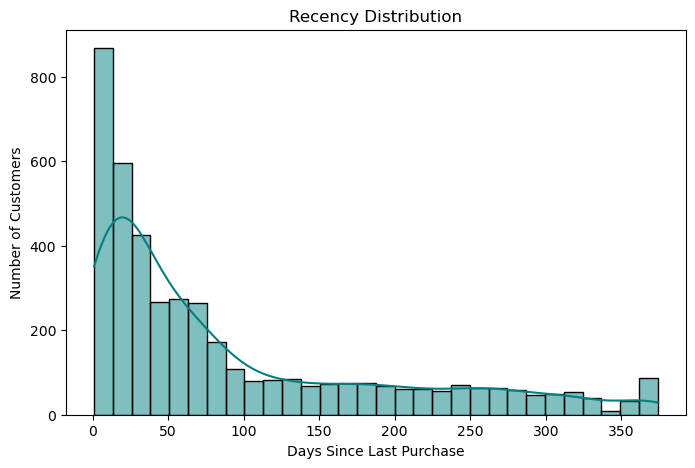

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(rfm['Recency'], bins=30,kde=True,color='teal')
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.show()

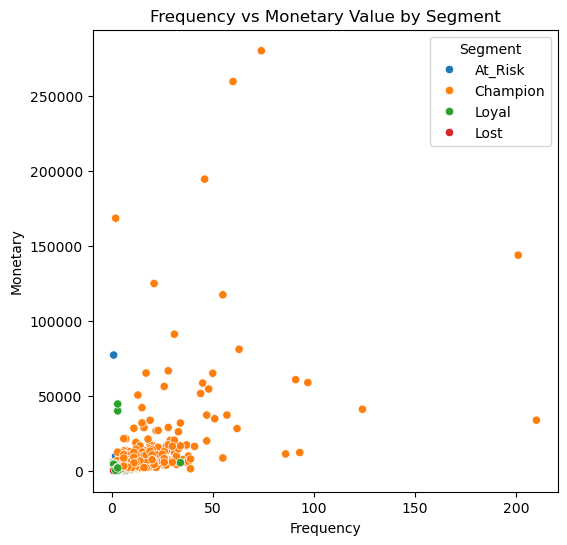

In [9]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='Frequency', y='Monetary', hue='Segment', data=rfm)
plt.title('Frequency vs Monetary Value by Segment')
plt.show()

In [11]:
summary = rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID':'Count'})

print(summary.sort_values('Monetary', ascending=False))

             Recency  Frequency     Monetary  Count
Segment                                            
Champion   19.226115   9.945064  5439.882755   1256
Loyal      55.963796   3.139922  1165.659580   1022
At_Risk   103.075552   1.623939   580.803542   1178
Lost      224.995470   1.045300   230.378822    883
